<a href="https://colab.research.google.com/github/AJ-AYUSHMAN/CodSoft-Internship-Projects/blob/main/Sales_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales data loaded successfully!
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Columns in the dataset: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


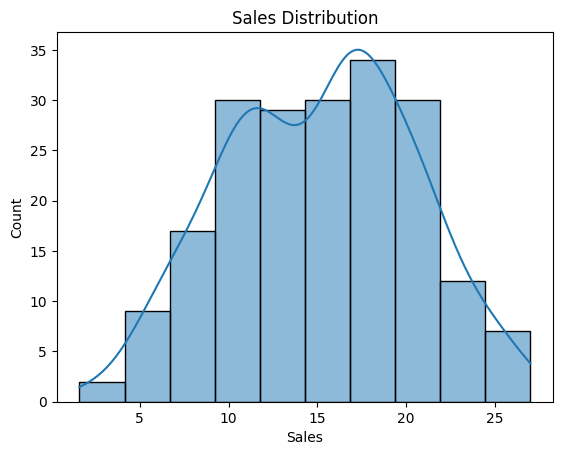

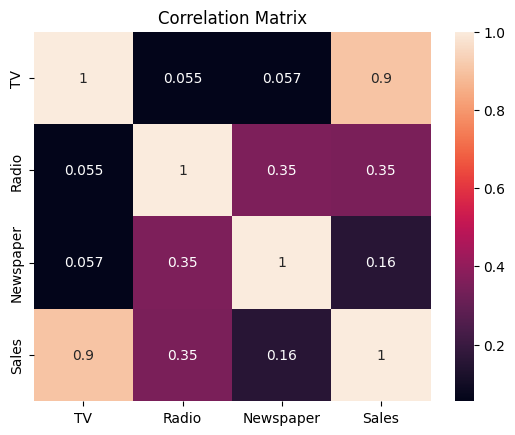

Train MSE: 0.0017405762993339343
Test MSE: 0.00940511141572643
Train R2: 0.9877912596545895
Test R2: 0.938814624125614
Predictions on test data:
[17.40674378 22.49822643 19.86631966  6.54806297 22.99263663 13.44439748
 22.60943595  9.6228618  16.83633123 16.80794447  7.45927079 10.14938807
 17.20343314  4.47758513 11.75385279 16.51926563  6.32199934 17.83481676
 11.52150683 19.80124141 19.87816166 12.82873206  9.97228109 21.5514709
 10.85742191  9.87648382 22.66149067 12.50052575 11.46896075  5.13191808
 16.52763786 10.97553777 22.87355186 10.05298061 19.8255545  20.012749
 10.72260039 19.56293339 12.45620121  7.55006227]
     Actual Sales  Predicted Sales
95           16.9        17.406744
15           22.4        22.498226
30           21.4        19.866320
158           7.3         6.548063
128          24.7        22.992637
115          12.6        13.444397
69           22.3        22.609436
170           8.4         9.622862
174          16.5        16.836331
45           16.1   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
try:
    data = pd.read_csv('/content/advertising.csv')  # Path after uploading
    print("Sales data loaded successfully!")
except FileNotFoundError:
    print("The file was not found. Please check the path and try again.")
    exit()

# Display the first few rows of the dataset
print(data.head())

# Display the column names
print("Columns in the dataset:", data.columns)

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(data.mean(), inplace=True)

# Display summary statistics
print(data.describe())

# Ensure the 'sales' column exists
if 'Sales' not in data.columns:
    print("The column 'sales' does not exist in the dataset. Please check the column names.")
    exit()

# Exploratory Data Analysis (EDA)
sns.histplot(data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering
data['log_sales'] = np.log(data['Sales'] + 1)
X = data.drop(['Sales', 'log_sales'], axis=1)
y = data['log_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

# Prediction on Test Data
sales_predictions = model.predict(X_test)
sales_predictions = np.exp(sales_predictions) - 1
print("Predictions on test data:")
print(sales_predictions)

# Comparing with actual sales
actual_sales = np.exp(y_test) - 1
comparison_df = pd.DataFrame({'Actual Sales': actual_sales, 'Predicted Sales': sales_predictions})
print(comparison_df)
